### Importing the dependencies!

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pickle
%matplotlib inline

### Importing the dataset

In [5]:
CC_data = pd.read_csv('UCI_Credit_Card.csv')

### Exploring the data-

In [6]:
CC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

    - 25 columns
    - No null/missing values
    - Target variable => default.payment.next.month (Column 25) 

In [7]:
CC_data.iloc[:, 1:].describe().T # Ignores the ID column

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


### Takeaways: 
    - 30,000 rows in the dataset. Target variable has two values- 0, and 1.
    - Age varies between 21 and 79
### Questions to answer:
    - Does age play a role in credit card default
    - Are more men going default then women, or is the gender division is the same for defaulters.
    - Does education lead to less defaults.
    - Prediction of future defaults based on given data.

In [8]:
CC_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
CC_data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


### Visited the website to read more about the dataset:
    - Gender: 1-Male, and 2-Female
    - LIMIT_BAL: Amount of given credit in NT dollars
    - Education: 1-Graduate School, 2-University, 3-High School, 4-Others, 5, and 6- Unknown
    - Marriage: 1- Married, 2-Single, 3-Others
    - Pay_X (Repayment status): -1-Pay Duly, 1-Payment delay for one month, 2- Delay for two months, ..., 9-Payment delay for 9 months
    - Bill_AMTX: Bill amount generated
    - Pay_AMTX: Amount of previous payment
    - Default payment: 1-Yes, and 0-No   

### Cleaning the dataset

In [10]:
CC_data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [11]:
# Education column has both 5 and 6 for unknown, combining both of them. Also, don't know what 0 is here. Merging that with 5 as well.
CC_data["EDUCATION"].replace((0, 6), 5 , inplace=True)
CC_data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

In [12]:
CC_data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [13]:
# Merging 0 and 3 for the Marriage feature.
CC_data['MARRIAGE'].replace((0), 3, inplace=True)
CC_data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [14]:
CC_data.isnull().sum() # Double-checking for the null values.

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

### Exploratory Data Analysis

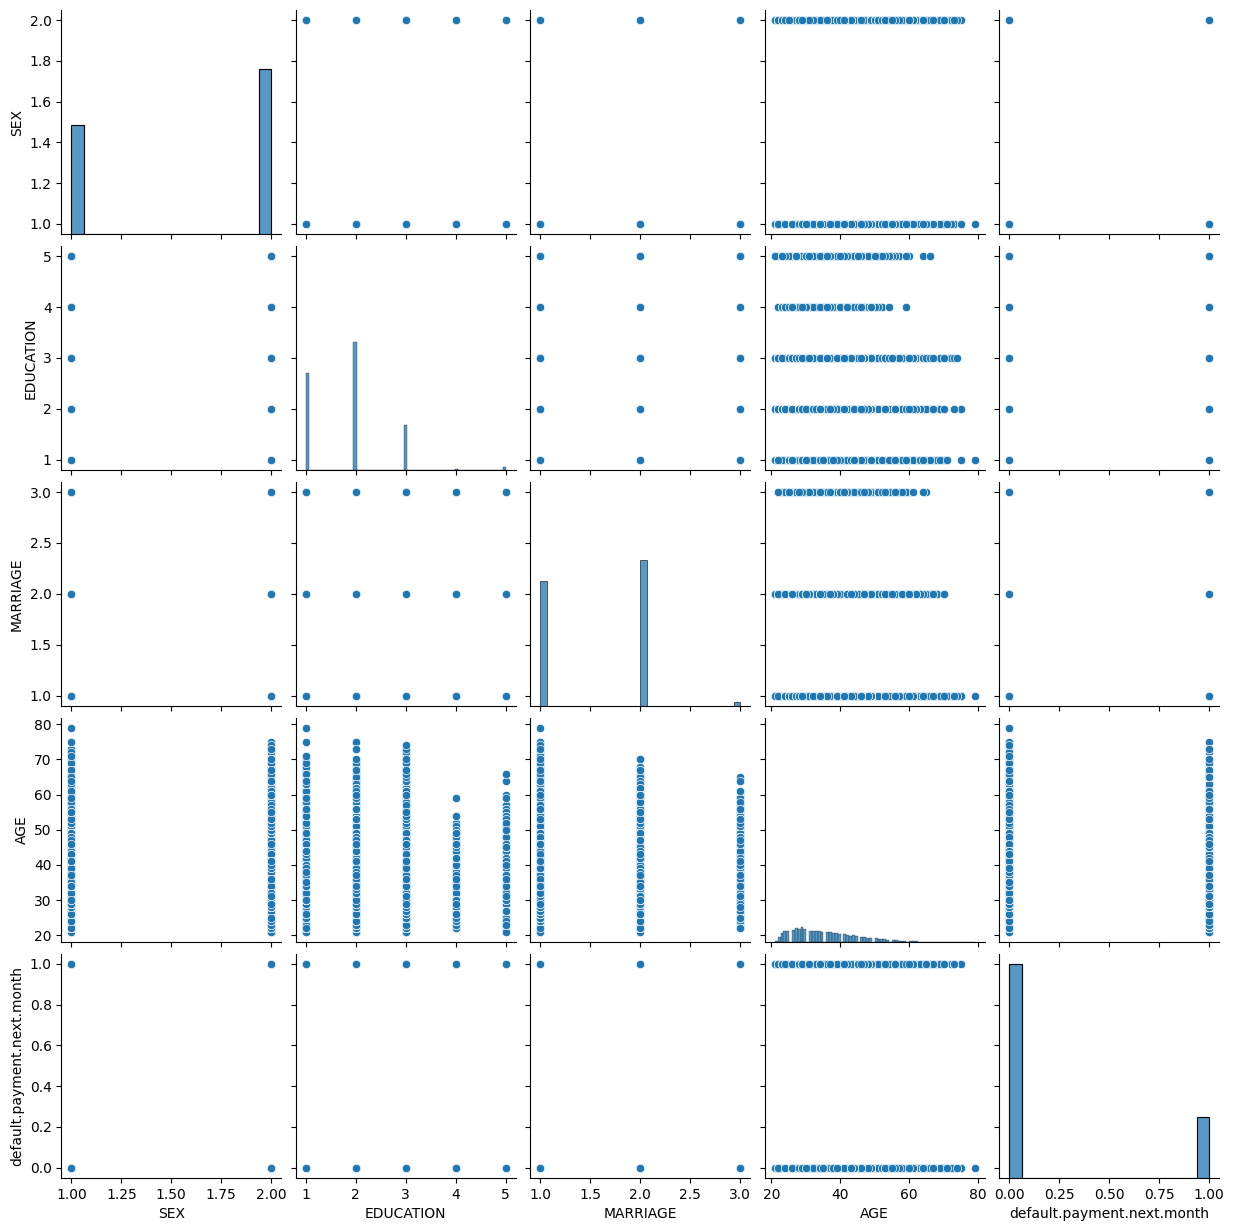

In [15]:
sns.pairplot(data=CC_data[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'default.payment.next.month']])
plt.show()

In [16]:
CC_data.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039718,-0.028208,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219365,-0.111012,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.013691,-0.028522,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039718,-0.219365,0.013691,1.000000,-0.131816,0.175499,0.105193,0.120662,0.113370,0.108355,...,-0.002208,-0.009384,-0.010872,-0.038229,-0.029372,-0.039936,-0.038786,-0.042082,-0.039017,0.026969
MARRIAGE,-0.028208,-0.111012,-0.028522,-0.131816,1.000000,-0.412001,0.018557,0.023620,0.032399,0.031831,...,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
AGE,0.018678,0.144713,-0.090874,0.175499,-0.412001,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105193,0.018557,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.120662,0.023620,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.113370,0.032399,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108355,0.031831,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


    - Checking for multi-collinearity.
    - The bill amounts are highly correlated. This makes some sense! Keeping the data as it is, can use feature engineering to get better results.
    - Rest of the data looks good.

In [17]:
# We can also change the column names for PAY_0, and our target variable.
CC_data.rename(columns={'default.payment.next.month':'default_pay', 'PAY_0':'PAY_1'}, inplace=True)

    - Is there any relation between age, and the account balance.
    - The distribution of dataset, how many defaulters.

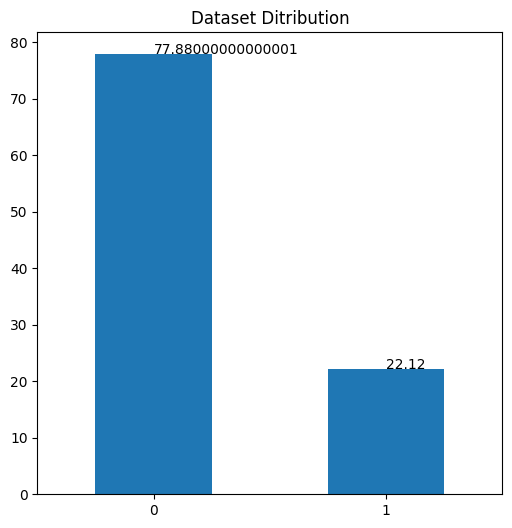

In [18]:
defaut_count = (CC_data['default_pay'].value_counts(normalize=True))*100
defaut_count.plot(kind='bar', figsize=(6, 6), title='Dataset Ditribution')
plt.xticks(rotation=0)
for x, y in zip([0, 1], defaut_count):
    plt.text(x, y, y)
plt.show()

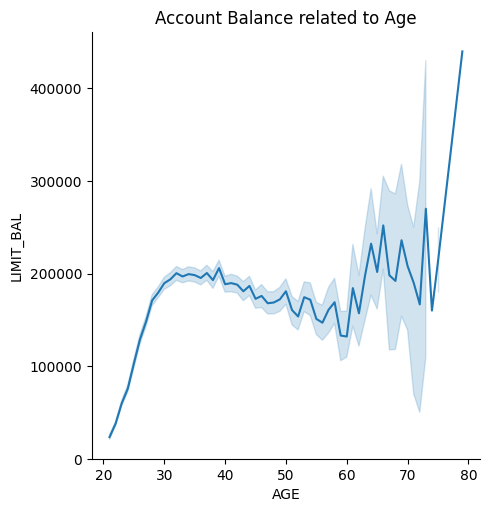

In [19]:
sns.relplot(data=CC_data, x='AGE', y='LIMIT_BAL', kind='line')
plt.title('Account Balance related to Age')
plt.show()

    - More than 70% of population did not default.
    - With age the income seems to grow, with an exception of age around 60 years. 

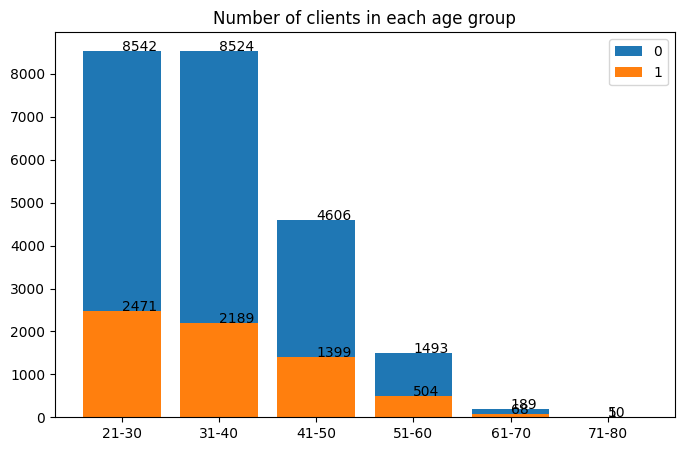

In [20]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
CC_data['Age_distribution'] = pd.cut(x=CC_data['AGE'], bins=bins, labels=names, right=True)
# print(CC_data.Age_distribution)

# age_cnt = CC_data['Age_distribution'].value_counts()
age_0 = (CC_data['Age_distribution'][CC_data['default_pay']==0]).value_counts()
age_1 = (CC_data['Age_distribution'][CC_data['default_pay']==1]).value_counts()

plt.subplots(figsize=(8, 5))
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')

for x, y in zip(names, age_0):
    plt.text(x, y, y)
for x, y in zip(names, age_1):
    plt.text(x, y, y)
plt.title('Number of clients in each age group')
plt.legend(loc='upper right')
plt.show()


    - We have maximum clients from 21-30 age group with a very close comparision with the second age group, 31-40. Hence, it can be observed that with increasing age group the number of clients that will default the payment next month is decreasing. AGE is important feature to predict the default payment for next month.

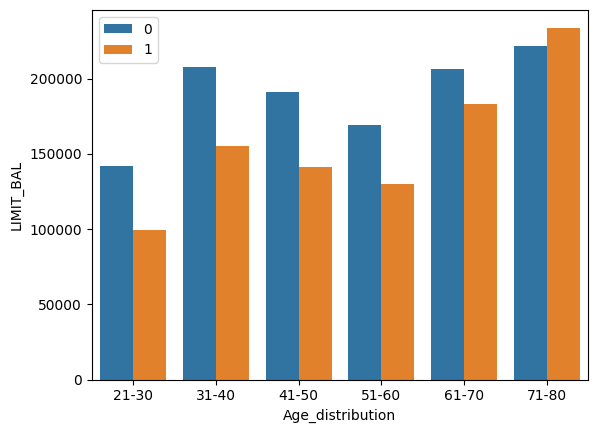

In [21]:
sns.barplot(data=CC_data, x='Age_distribution', y='LIMIT_BAL', hue='default_pay', errorbar=('ci', 0))
plt.legend(loc='upper left')
plt.show()

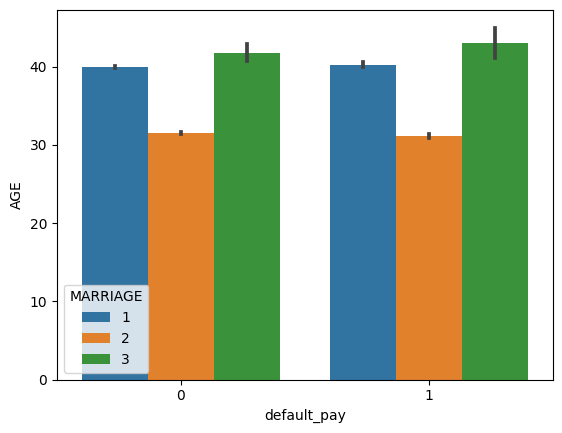

In [22]:
sns.barplot(data=CC_data, x='default_pay', y='AGE', hue='MARRIAGE')
plt.show()

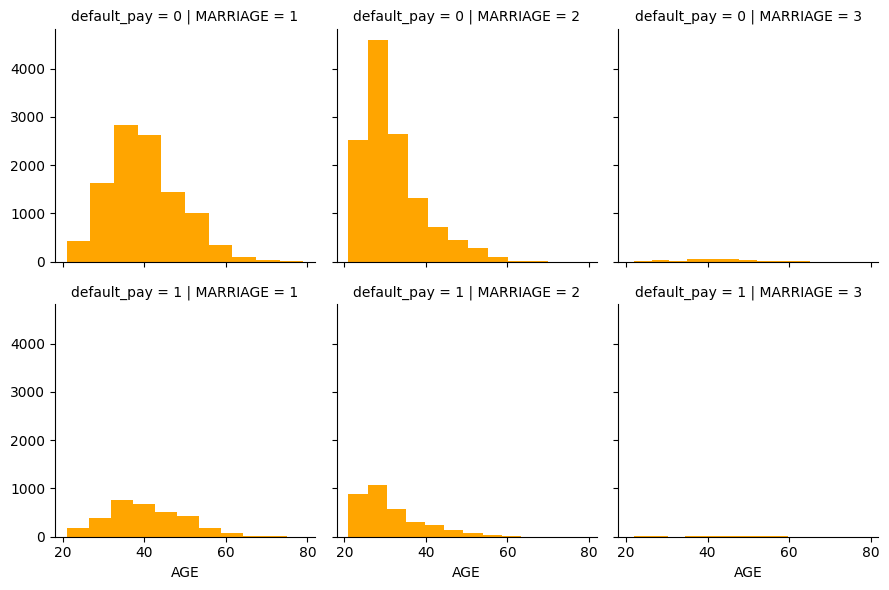

In [23]:
graph = sns.FacetGrid(CC_data, row='default_pay', col='MARRIAGE') # Making a grid! Subplot for each and every value for row, and column variable.
graph.map(plt.hist, 'AGE', color='orange')
plt.show()

    - Married person between 30 and 50, and unmarried clients of age group 20-30 tend to default payment. With unmarried clients having a higher probability to default payment. Hence including MARRIAGE to find probability of defaulting the payment next month can be useful.

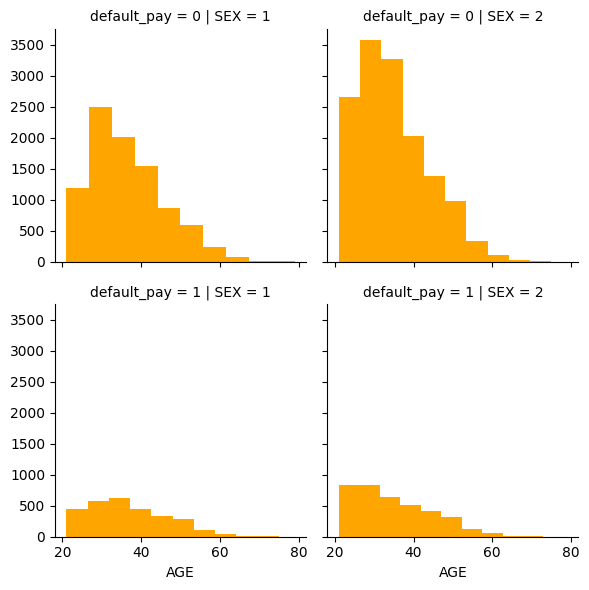

In [24]:
graph = sns.FacetGrid(CC_data, row='default_pay', col='SEX')
graph.map(plt.hist, 'AGE', color='orange')
plt.show()

    - Females from age group 20-30 have very high tendency to default the payment as oposed to males in all age brackets.

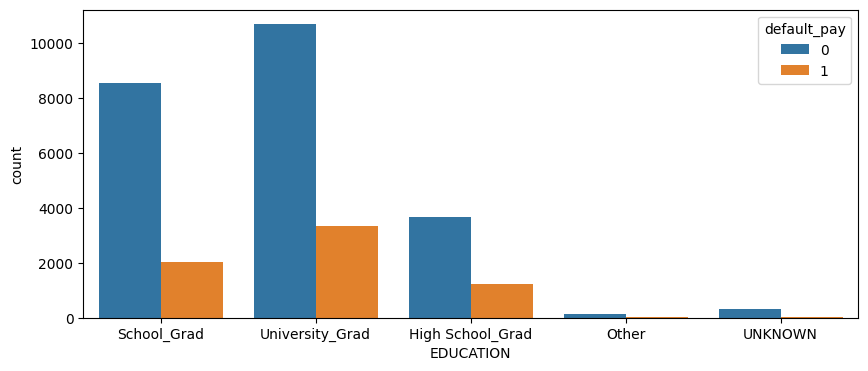

In [25]:
plt.figure(figsize=(10, 4))
edu_count = sns.countplot(data=CC_data, x='EDUCATION', hue='default_pay')
edu_count.set_xticklabels(['School_Grad','University_Grad','High School_Grad','Other',"UNKNOWN"])
plt.show()

    - Even though university graduates tend to default the least among other groups, they also tend to default the most when compared to other people with different level of education. It might mean that university graduates may have more credit cards then other people. Have to check this relation as well.

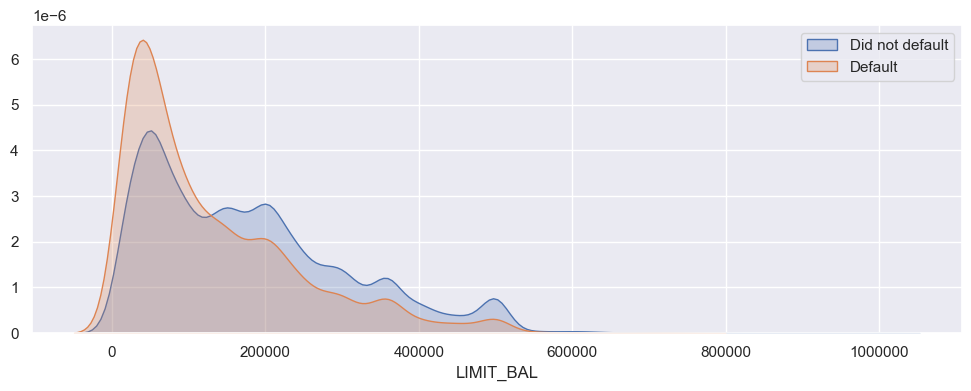

In [26]:
plt.figure(figsize=(12,4)) 
sns.set(font_scale=1)
# kernel density estimation
sns.kdeplot(CC_data.loc[(CC_data['default_pay'] == 0), 'LIMIT_BAL'], label='Did not default', fill=True)
sns.kdeplot(CC_data.loc[(CC_data['default_pay'] == 1), 'LIMIT_BAL'], label='Default', fill=True)
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.legend()
plt.show()

    - Most of the population has less than 200K credit limit.
    - Most of the defaults fall within the population. 

In [27]:
CC_data['LimitBin'] = pd.cut(CC_data['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])

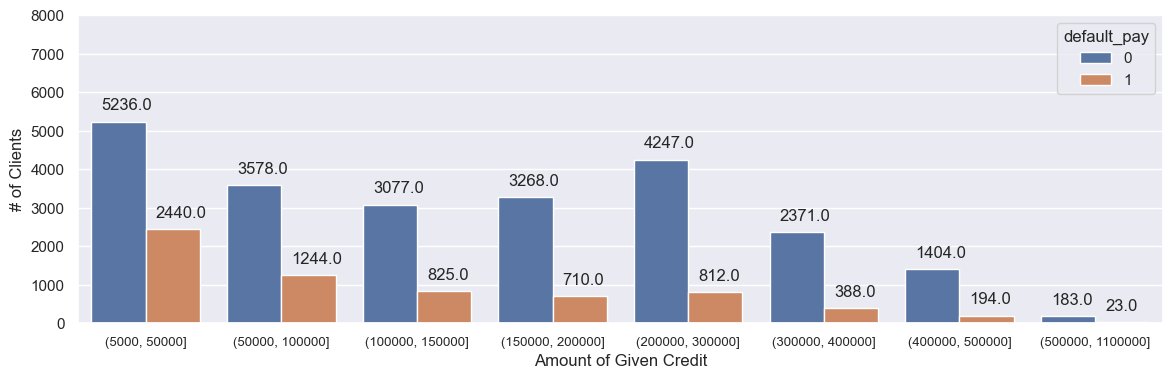

In [28]:
plt.figure(figsize=(14,4))
sns.set(font_scale=1)
CC_data['LimitBin'] = CC_data['LimitBin'].astype('str') # astype() : cast a pandas object to a specified dtype

LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.countplot(data=CC_data, x='LimitBin' , hue="default_pay", order = LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)
ax.tick_params(axis="x", labelsize= 9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))
    
plt.show()

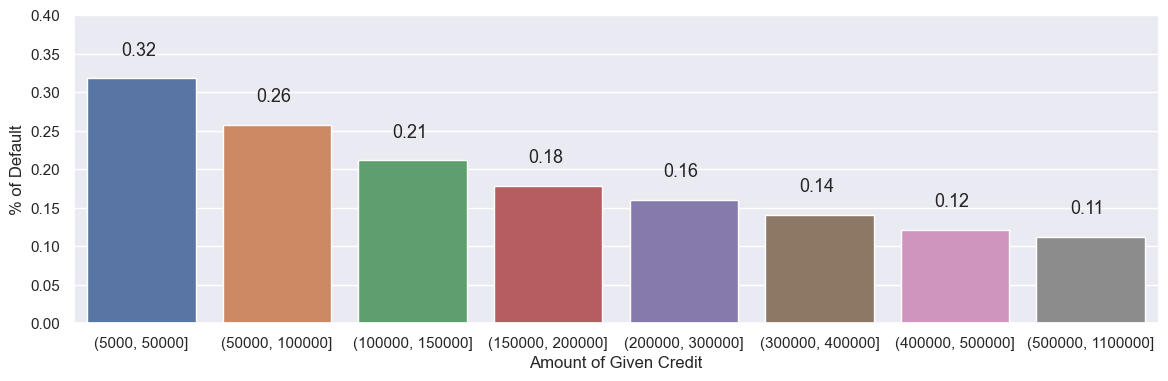

In [29]:
plt.figure(figsize=(14,4))
sns.set(font_scale=1)
ax = sns.barplot(x = "LimitBin", y = "default_pay", data = CC_data, order = LimitBin_order, errorbar=None)

 
plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0, 0.4)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03), fontsize=13)

plt.show()

    - More credit, lesser the chance of default.
    - Over 30% users with a credit less than 50k defaulted.

### Data Preparation!

In [30]:
CC_data.rename(columns=lambda x: x.lower(), inplace=True)

In [31]:
# Education
CC_data['grad_school'] = (CC_data['education'] == 1).astype('int')
CC_data['university'] = (CC_data['education'] == 2).astype('int')
CC_data['high_school'] = (CC_data['education'] == 3).astype('int')
CC_data.drop('education', axis=1, inplace=True)

# Gender
CC_data['male'] = (CC_data['sex']==1).astype('int')
CC_data.drop('sex', axis=1, inplace=True)

# Married
CC_data['married'] = (CC_data['marriage'] == 1).astype('int')
CC_data.drop('marriage', axis=1, inplace=True)

# For pay features if the <= 0 then it means it was not delayed
pay_features = ['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']
for p in pay_features:
    CC_data.loc[CC_data[p]<=0, p] = 0

In [32]:
CC_data.head(10)

,id,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,pay_amt5,pay_amt6,default_pay,age_distribution,limitbin,grad_school,university,high_school,male,married
0,1,20000.0,24,2,2,0,0,0,0,3913.0,...,0.0,0.0,1,21-30,"(5000, 50000]",0,1,0,0,1
1,2,120000.0,26,0,2,0,0,0,2,2682.0,...,0.0,2000.0,1,21-30,"(100000, 150000]",0,1,0,0,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,1000.0,5000.0,0,31-40,"(50000, 100000]",0,1,0,0,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,1069.0,1000.0,0,31-40,"(5000, 50000]",0,1,0,0,1
4,5,50000.0,57,0,0,0,0,0,0,8617.0,...,689.0,679.0,0,51-60,"(5000, 50000]",0,1,0,1,1
5,6,50000.0,37,0,0,0,0,0,0,64400.0,...,1000.0,800.0,0,31-40,"(5000, 50000]",1,0,0,1,0
6,7,500000.0,29,0,0,0,0,0,0,367965.0,...,13750.0,13770.0,0,21-30,"(400000, 500000]",1,0,0,1,0
7,8,100000.0,23,0,0,0,0,0,0,11876.0,...,1687.0,1542.0,0,21-30,"(50000, 100000]",0,1,0,0,0
8,9,140000.0,28,0,0,2,0,0,0,11285.0,...,1000.0,1000.0,0,21-30,"(100000, 150000]",0,0,1,0,1
9,10,20000.0,35,0,0,0,0,0,0,0.0,...,1122.0,0.0,0,31-40,"(5000, 50000]",0,0,1,1,0


In [33]:
CC_data .drop('limitbin', axis=1, inplace=True)
CC_data.drop('age_distribution', axis=1, inplace=True)
CC_data.drop('id', axis=1, inplace=True)

In [34]:
x = CC_data.drop('default_pay', axis=1)
y = CC_data['default_pay']

In [35]:
x.head()

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,grad_school,university,high_school,male,married
0,20000.0,24,2,2,0,0,0,0,3913.0,3102.0,...,689.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,120000.0,26,0,2,0,0,0,2,2682.0,1725.0,...,1000.0,1000.0,1000.0,0.0,2000.0,0,1,0,0,0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,1,0,0,0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,1,0,0,1
4,50000.0,57,0,0,0,0,0,0,8617.0,5670.0,...,36681.0,10000.0,9000.0,689.0,679.0,0,1,0,1,1


In [36]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_pay, dtype: int64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [39]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

0.13609053556181536

In [45]:
logistic_regression = LogisticRegression(n_jobs=4, random_state=15)
logistic_regression.fit(X_train, y_train)

prediction = logistic_regression.predict(X_test)
mean_absolute_error = metrics.mean_absolute_error(y_test, prediction)
mean_squared_error = metrics.mean_squared_error(y_test, prediction)
root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y_test, prediction))
print(f'Mean Absolute Error: {mean_absolute_error}')
print(f'Mean Squared Error: {mean_squared_error}')
print(f'Root Mean Squared Error: {root_mean_squared_error}')

Mean Absolute Error: 0.17816666666666667
Mean Squared Error: 0.17816666666666667
Root Mean Squared Error: 0.42209793492348036


In [47]:
with open("logistic_regression","wb") as f:
    pickle.dump(logistic_regression, f)
with open("logistic_regression","rb") as f:
    lr = pickle.load(f)